In [1]:
# load the mnist data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [2]:
print(type(X_train), X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


Text(0.5, 1.0, '5')

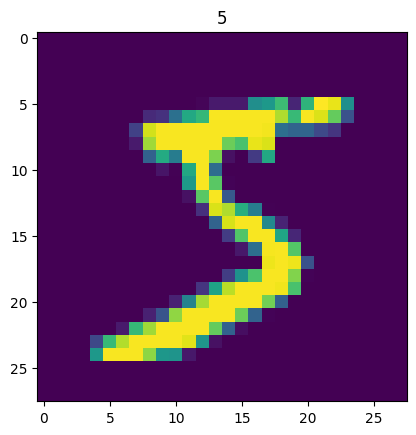

In [7]:
# visualize the data
img1 = X_train[0]

%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
# 注意不是 imgshow()
plt.imshow(img1) # 28*28 = 784个数据点
plt.title(y_train[0])
plt.show()

In [13]:
# format the input data
feature_size = img1.shape[0] * img1.shape[1]

X_train_format = X_train.reshape(X_train.shape[0], feature_size)
X_test_format = X_test.reshape(X_test.shape[0], feature_size)

In [16]:
# normalize the input data
X_train_normal = X_train_format / 255
X_test_normal = X_test_format / 255

In [21]:
# format the output data(labels)
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)

In [18]:
# set up the model
from keras.models import Sequential
from keras.layers import Dense, Activation

mlp = Sequential()
# frature_size 个输入数据，392个隐藏神经元
mlp.add(Dense(units=392, activation='sigmoid', input_dim=feature_size))
# 下一层也是有 392个隐藏神经元
mlp.add(Dense(units=392, activation='sigmoid'))
# 输出层只有10个节点
mlp.add(Dense(units=10, activation='softmax'))
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 392)               154056    
                                                                 
 dense_2 (Dense)             (None, 10)                3930      
                                                                 
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [19]:
# configure the model
# 多分类就不是 binary 了，是 categorical_crossentropy
mlp.compile(loss='categorical_crossentropy', optimizer='adam')

In [22]:
# train the model
mlp.fit(X_train_normal, y_train_format, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3412
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1441
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0927
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0654
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0479
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0351
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0272
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0205
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0161
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0131


In [30]:
# evaluate the model
import numpy as np
# 多分类用 np.argmax
y_train_predict = np.argmax(mlp.predict(X_train_normal), axis=-1)
print(y_train_predict)

1875/1875 [==============================] - 3s 2ms/step
[5 0 4 ... 5 6 8]


In [29]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_train_predict)
print(accuracy_train)

0.9963


In [31]:
y_test_predict = np.argmax(mlp.predict(X_test_normal), axis=-1)
accuracy_test = accuracy_score(y_test, y_test_predict)
print(accuracy_test)

313/313 [==============================] - 1s 2ms/step
0.9786


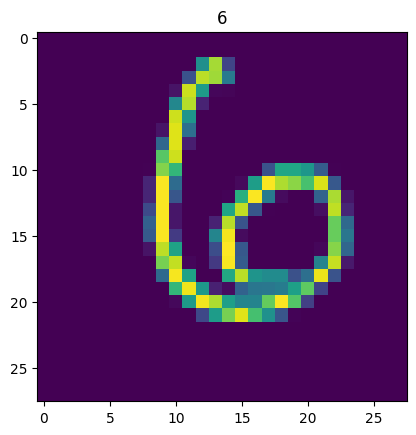

In [34]:
# 随机查看是否正确
img2 = X_test[100]
fig2 = plt.figure()
plt.imshow(img2)
plt.title(y_test_predict[100])
plt.show()